In [1]:
from functions import *

In [2]:
phase_diagrams = {}
q = {}
q_avg = {}

for n in range(5,11):
    phase_diagrams[n] = load_from_json(f'data/phase_diagram_n{n}.json')
    q[n] = phase_diagrams[n]['q']
    q_avg[n] = phase_diagrams[n]['q_avg']

gamma_range = phase_diagrams[7]['gamma_range']
T_range = phase_diagrams[7]['T_range']
num_random_models = phase_diagrams[7]['num_random_models']

# Define a custom palette

In [3]:
from matplotlib.colors import LinearSegmentedColormap

# Define the colors for the custom colormap
colors = [
          (1.0, 1.0, 1.0),  # white
          (1.0, 1.0, 1.0), #'#f0d3d3',  # light grey
          dark_grey]  # red (default color of coolwarm colormap)

# Create a custom colormap
cmap_name = 'cmap_custom'
cmap_custom = LinearSegmentedColormap.from_list(cmap_name, colors)

In [7]:
from matplotlib.ticker import ScalarFormatter

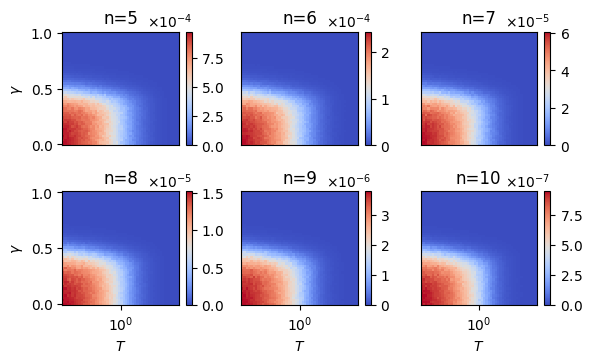

In [8]:
# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(figure_size_x, figure_size_y))

# Plot data on each subplot

pc00 = axs[0, 0].pcolor(T_range, 
                        gamma_range,
                        q_avg[5], 
                        cmap='coolwarm',
                        vmin=0,
                        vmax=np.max(q_avg[5])
                        # vmax=0.065,
                        )
pc01 = axs[0, 1].pcolor(T_range, 
                        gamma_range,
                        q_avg[6], 
                        cmap='coolwarm',
                        vmin=0,
                        vmax=np.max(q_avg[6])
                        # vmax=0.065,
                        )
pc02 = axs[0, 2].pcolor(T_range, 
                        gamma_range,
                        q_avg[7], 
                        cmap='coolwarm',
                        vmin=0,
                        vmax=np.max(q_avg[7])
                        # vmax=0.065,
                        )
pc10 = axs[1, 0].pcolor(T_range, 
                        gamma_range,
                        q_avg[8], 
                        cmap='coolwarm',
                        vmin=0,
                        vmax=np.max(q_avg[8])
                        # vmax=0.04,
                        )
pc11 = axs[1, 1].pcolor(T_range, 
                        gamma_range,
                        q_avg[9], 
                        cmap='coolwarm',
                        vmin=0,
                        vmax=np.max(q_avg[9])
                        # vmax=0.04,
                        )
pc12 = axs[1, 2].pcolor(T_range, 
                        gamma_range,
                        q_avg[10], 
                        cmap='coolwarm',
                        vmin=0,
                        vmax=np.max(q_avg[10]),
                        # vmax=0.04,
                        )
# Instead of calling fig.colorbar() repeatedly in a loop, use a list to store all the pcolor objects
pc = [pc00, pc01, pc02, pc10, pc11, pc12]

for i, ax in enumerate(axs.flat):
    # Create a colorbar for each plot, use the same vmax for consistency or adjust as needed
    cbar = fig.colorbar(pc[i], ax=ax)
    
    # Set the format of the colorbar's tick labels to scientific notation
    formatter = ScalarFormatter(useMathText=True)  # Enable math text for 'e' in scientific notation
    formatter.set_scientific(True)  # Enable scientific notation
    formatter.set_powerlimits((-1, 1))  # Adjust range for switching to scientific notation
    cbar.ax.yaxis.set_major_formatter(formatter)  # Apply this formatter to the colorbar

# Set log scale
axs[0, 0].set_xscale('log')
axs[0, 1].set_xscale('log')
axs[0, 2].set_xscale('log')
axs[1, 0].set_xscale('log')
axs[1, 1].set_xscale('log')
axs[1, 2].set_xscale('log')

# Set labels
axs[1, 0].set_xlabel('$T$')
axs[1, 1].set_xlabel('$T$')
axs[1, 2].set_xlabel('$T$')

axs[0, 0].set_ylabel('$\gamma$')
axs[1, 0].set_ylabel('$\gamma$')

# Set ticks to []
axs[0, 0].set_xticks([])
axs[0, 1].set_xticks([])
axs[0, 2].set_xticks([])

axs[0, 1].set_yticks([])
axs[0, 2].set_yticks([])
axs[1, 1].set_yticks([])
axs[1, 2].set_yticks([])

axs[0, 0].set_title('n=5')
axs[0, 1].set_title('n=6')
axs[0, 2].set_title('n=7')
axs[1, 0].set_title('n=8')
axs[1, 1].set_title('n=9')
axs[1, 2].set_title('n=10')


# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

fig.savefig(f'figures/phase_diagram_n5_10')

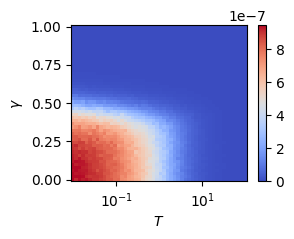

In [11]:
fig = plt.figure(figsize=(figure_size_x/2, figure_size_y/1.5))

# Plot data on each subplot

pc = plt.pcolor(T_range, 
                gamma_range,
                q_avg[10], 
                cmap='coolwarm',
                vmin=0,
                vmax=np.max(q_avg[10]),
                # vmax=0.04,
                )

fig.colorbar(pc)

plt.xscale('log')

# Set labels
plt.xlabel('$T$')
plt.ylabel('$\gamma$')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

fig.savefig(f'figures/phase_diagram_n10')

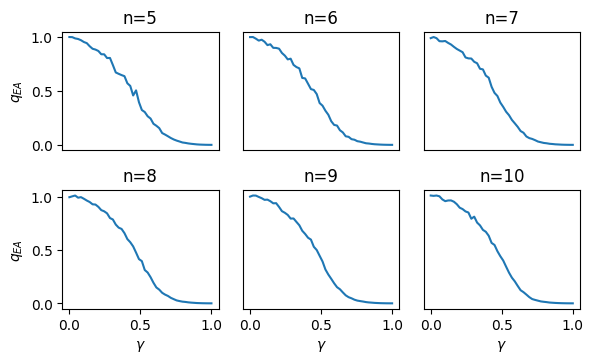

In [26]:
# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(figure_size_x, figure_size_y))

# Plot data on each subplot

pc5 = axs[0,0].plot(gamma_range, 
              np.array(q_avg[5][1][:]) / q_avg[5][1][0])
pc6 = axs[0,1].plot(gamma_range, 
              np.array(q_avg[6][1][:]) / q_avg[6][1][0])
pc7 = axs[0,2].plot(gamma_range, 
              np.array(q_avg[7][1][:]) / q_avg[7][1][0])
pc8 = axs[1,0].plot(gamma_range, 
              np.array(q_avg[8][1][:]) / q_avg[8][1][0])
pc9 = axs[1,1].plot(gamma_range, 
              np.array(q_avg[9][1][:]) / q_avg[9][1][0])
pc10 = axs[1,2].plot(gamma_range, 
              np.array(q_avg[10][1][:]) / q_avg[10][1][0])

# Set labels
axs[1, 0].set_xlabel('$\gamma$')
axs[1, 1].set_xlabel('$\gamma$')
axs[1, 2].set_xlabel('$\gamma$')

axs[0, 0].set_ylabel('$q_{EA}$')
axs[1, 0].set_ylabel('$q_{EA}$')

# Set ticks to []
axs[0, 0].set_xticks([])
axs[0, 1].set_xticks([])
axs[0, 2].set_xticks([])

axs[0, 1].set_yticks([])
axs[0, 2].set_yticks([])
axs[1, 1].set_yticks([])
axs[1, 2].set_yticks([])

axs[0, 0].set_title('n=5')
axs[0, 1].set_title('n=6')
axs[0, 2].set_title('n=7')
axs[1, 0].set_title('n=8')
axs[1, 1].set_title('n=9')
axs[1, 2].set_title('n=10')


# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

fig.savefig(f'figures/phase_transition_gamma')

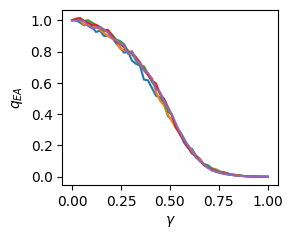

In [24]:
fig = plt.figure(figsize=(figure_size_x/2, figure_size_y/1.5))

# Plot data on each subplot

pc6 = plt.plot(gamma_range, 
              np.array(q_avg[6][1][:]) / q_avg[6][1][0])
pc7 = plt.plot(gamma_range, 
              np.array(q_avg[7][1][:]) / q_avg[7][1][0])
pc8 = plt.plot(gamma_range, 
              np.array(q_avg[8][1][:]) / q_avg[8][1][0])
pc9 = plt.plot(gamma_range, 
              np.array(q_avg[9][1][:]) / q_avg[9][1][0])
pc10 = plt.plot(gamma_range, 
              np.array(q_avg[10][1][:]) / q_avg[10][1][0])

# Set labels
plt.xlabel('$\gamma$')
plt.ylabel('$q_{EA}$')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

fig.savefig(f'figures/phase_transition_gamma')